# Assignment 2 - Frequency and probability
## EEB 463




This week, you will learn about how to program with (pseudo-) randomness to generate frequency distributions. 

To get started, we will need to import the `random` module in order to generate some stochasticity. `random` contains many useful functions for generating different sorts of random values and randomly subsampling data structures, but we will try to restrict our use to `random.random()`. This particular function will generate a pseudorandom floating point number between zero and 1. The reason for this is that most of the additional functions in Python's `random` module are simply "wrappers" for `random.random()`, which means that they use it to perform another operation (in a way that is usually pretty simple). Since one goal of this course is to learn how to think like a programmer, we will simply use `random.random()` as-is to do this work ourselves.

In [2]:
import random
import matplotlib.pyplot as plt 

**Q1:** Imagine you are an indecisive and time-limited person like Tomo. Taking the dinner ideas contained within the list `dinner_options` defined below, use `random.random()` to draw a random option.

In [7]:
dinner_options = ["cheeseburger", "stir fry", "sushi", "curry", "soup", "tuna casserole", "spaghetti and meatballs", "omelette and salad", "roast chicken", "tacos"]
n_options = len(dinner_options)
rnd_num = random.random() 
choice_index = int(rnd_num*n_options)
print(dinner_options[choice_index])


## COMPLETE TASK HERE


cheeseburger


**Q2:** Suppose that you want to use this tool to plan out meals for the four evenings spanning Monday-Thursday. Further suppose have a finicky palate and cannot tolerate eating the same meal two nights in a row. Create a function that samples four meals that you can eat each work week that guarantees you won't draw the same meal twice.

In [6]:
## Complete the function below
def weeknight_meal_picker(dinner_options):
    options = dinner_options
    choices = []
    for day in range(4): 
        n_options = len(options)
        rnd_num = random.random() 
        choice_index = int(rnd_num*n_options)
        choice = dinner_options[choice_index]
        choices.append(choice)   
        options.remove(choice)
    return choices 

#dinner_options = ["cheeseburger", "stir fry", "sushi", "curry", "soup", "tuna casserole", "spaghetti and meatballs", "omelette and salad", "roast chicken", "tacos"]
print(dinner_options)
weeknight_meal_picker(dinner_options)
print(dinner_options)


['cheeseburger', 'stir fry', 'sushi', 'curry', 'soup', 'tuna casserole', 'spaghetti and meatballs', 'omelette and salad', 'roast chicken', 'tacos']
['cheeseburger', 'stir fry', 'soup', 'tuna casserole', 'omelette and salad', 'roast chicken']


**Q3:** Let's say you really want to make sure the tool you have created isn't biasing choices in favor of any particular option. Perform the following steps to verify that you will not be stuck eating any one meal more often than any other.

**Q3a.** Create a dictionary with the various dinner options as keys and initial values of 0. Call this variable `dinner_options_dict`.


In [ ]:
dinner_options = ["cheeseburger", "stir fry", "sushi", "curry", "soup", "tuna casserole", "spaghetti and meatballs", "omelette and salad", "roast chicken", "tacos"]
dinner_options_dict = {option:0 for option in dinner_options}

**Q3b.** Your goal will be to repeatedly sample 4-night workweek meal plans. Within this loop run the function created in Q2. Create a for loop that loops over `range(n)`. For each iteration, use your function to sample a weekly meal plan. Every time you draw a new meal plan, increase the tally of the value associated with each meal in the plan that you stored in `dinner_options_dict`.The final goal will be to have a dictionary where each key is a meal in our list of options and each value is the number of times it was sampled using our scheme.

In [ ]:
n=10000
for rep in range(n): 
    dinner_options = ["cheeseburger", "stir fry", "sushi", "curry", "soup", "tuna casserole", "spaghetti and meatballs", "omelette and salad", "roast chicken", "tacos"]
    weeknight_choices = weeknight_meal_picker(dinner_options)
    for choice in weeknight_choices:
        dinner_options_dict[choice] += 1 

**Q3c.** Run the code you wrote in 3b, setting the number of iterations to some fairly large number (e.g., 1000). This means you will sample 10000 meal plans. Create a barplot where each bar on the x-axis is a meal in the original list and the y-axis represents the number of times we sampled it in 3b. Is our sampler biased or uniform? If it is doing what we expect, we should sample each choice around the same number of times.


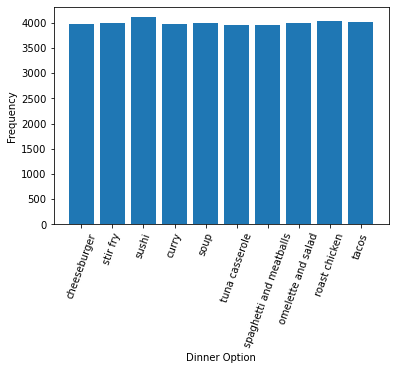

In [89]:
plt.bar(list(dinner_options_dict.keys()), height=list(dinner_options_dict.values()))  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Dinner Option')
plt.xticks(rotation=70);

**Q4a:** In this question, we will use simulation to explore the behavior of a classic exercise in probability theory. _How many people do you need to gather in a room to ensure that there is a 50% chance that any two of them share the same birthday?_ For the first part of the question, design a function that randomly samples birthdays from a population of _N_ individuals and checks whether 2 or more members of the group share a birthday and returns `True` if there is at least one shared birthday and `False` if not.

In [96]:
def sample_pop_bdays(pop_size):
    share_birthday = False 
    birthdays = [ int(random.random()*365)+1 for individual in range(pop_size) ]
    bday_counts = {}
    for bday in birthdays: 
        try:
            bday_counts[bday] += 1
        except: 
            bday_counts[bday] = 1
    for bday in bday_counts: 
        if bday_counts[bday] > 1: 
            share_birthday = True 
            break 
    return share_birthday

sample_pop_bdays(100)

True

**Q4b:** Write another function that uses the function you composed in the previous question in a for loop to count the number of times that you observe a shared birthday over 10000 iterations. Each of the iterations in the loop is called a **replicate**. Use this number to calculate the proportion of times or _frequency_ with which you observe one or more shared birthdays in the population. 

In [98]:
def shared_bday_frequency(pop_size):
    positive_outcome = 0 
    for rep in range(10000): 
        if sample_pop_bdays(pop_size):
            positive_outcome += 1
    return positive_outcome/10000.0

**Q4c:** Use the function you wrote in the previous question to estimate the frequency with which you observe a shared birthday across a range of population sizes in order to find the number of people that are required to lead to a 50% expectation that any two members share a birthday. You might use a for loop to calculate this frequency over a range of population sizes, starting from a small number of people (say, around 5-10), and ending at some fairly large number. Store the results in a dictionary, with the keys being the size of the population and the values being the proportion of replicates in which two individuals share a birthday. 

In [108]:
output_dict = {} 
for pop_size in range(5,50): 
    output_dict[pop_size] = shared_bday_frequency(pop_size)
print(output_dict)

{5: 0.0248, 6: 0.0391, 7: 0.0579, 8: 0.0717, 9: 0.0889, 10: 0.1159, 11: 0.1412, 12: 0.1751, 13: 0.1921, 14: 0.2194, 15: 0.2536, 16: 0.292, 17: 0.3193, 18: 0.3426, 19: 0.3793, 20: 0.4152, 21: 0.4429, 22: 0.4677, 23: 0.5, 24: 0.5372, 25: 0.5727, 26: 0.6021, 27: 0.6313, 28: 0.6698, 29: 0.6777, 30: 0.7158, 31: 0.7296, 32: 0.7544, 33: 0.7656, 34: 0.7901, 35: 0.8125, 36: 0.8367, 37: 0.8435, 38: 0.8592, 39: 0.8811, 40: 0.8915, 41: 0.9008, 42: 0.9137, 43: 0.9264, 44: 0.93, 45: 0.9432, 46: 0.9462, 47: 0.9556, 48: 0.9615, 49: 0.9647}


**Q4d.** Create a graph showing how the odds of birthday sharing changes as you increase population size, with the x-axis representing population size and the y-axis representing birthday sharing frequency. Next, answer the question. **How many individuals are needed to generate a 50% chance that any two of them share a birthday?** How many are needed for there to be a 90% chance? Are these higher or lower than you expected? 

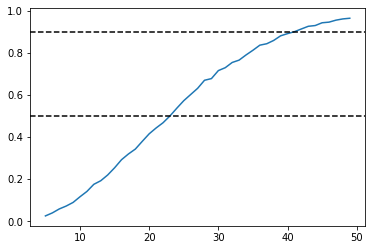

In [111]:
plt.plot(output_dict.keys(), output_dict.values())
plt.axhline(y=0.5, color = 'black', linestyle = '--')
plt.axhline(y=0.9, color = 'black', linestyle = '--')